### Data Analysis using NumPy, Pands & Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

Exercise 1: Exploratory Data Analysis and Trend Visualization of Stock Prices

In [2]:
# generate synthetic stock price data

np.random.seed(42)
days = np.arange(1, 101)
prices = 100 + np.cumsum(np.random.normal(0, 1, size = 100)) # random walk
df = pd.DataFrame({'Day': days, 'Stock_Price': prices})

In [3]:
# basic data exploration

df.head(5)

,Day,Stock_Price
0,1,100.496714
1,2,100.358450
2,3,101.006138
3,4,102.529168
4,5,102.295015


In [4]:
df.describe()

,Day,Stock_Price
count,100.000000,100.000000
mean,50.500000,93.594818
std,29.011492,4.643998
min,1.000000,87.753344
25%,25.750000,90.132492
50%,50.500000,91.727866
75%,75.250000,95.940029
max,100.000000,104.480611


In [5]:
# rolling average calculation

df['Rolling_Mean_5'] = df['Stock_Price'].rolling(window = 5).mean()
df['Rolling_Std_5'] = df['Stock_Price'].rolling(window = 5).std()

In [6]:
df.head(10)

,Day,Stock_Price,Rolling_Mean_5,Rolling_Std_5
0,1,100.496714,NaN,NaN
1,2,100.358450,NaN,NaN
2,3,101.006138,NaN,NaN
3,4,102.529168,NaN,NaN
4,5,102.295015,101.337097,1.013924
5,6,102.060878,101.649930,0.927424
6,7,103.640091,102.306258,0.945971
7,8,104.407525,102.986535,0.998821
8,9,103.938051,103.268312,1.035589
9,10,104.480611,103.705431,0.981934


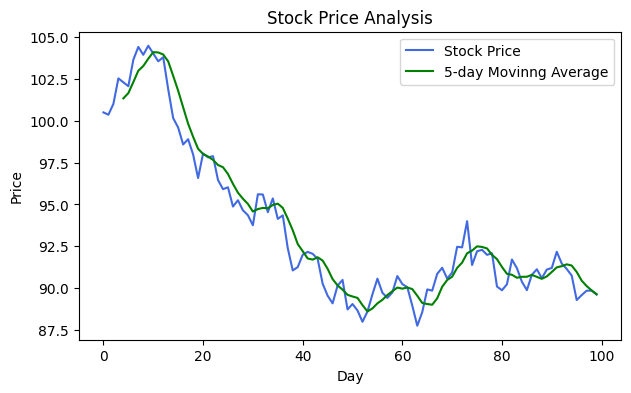

In [7]:
# data visualization

line_one = df['Stock_Price']
line_two = df['Rolling_Mean_5']
line_three = df['Rolling_Std_5']

plt.figure(figsize = (7, 4))
plt.plot(line_one, label = 'Stock Price', color = 'royalblue')
plt.plot(line_two, label = '5-day Movinng Average', color = 'green')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Analysis')
plt.legend()
plt.show()

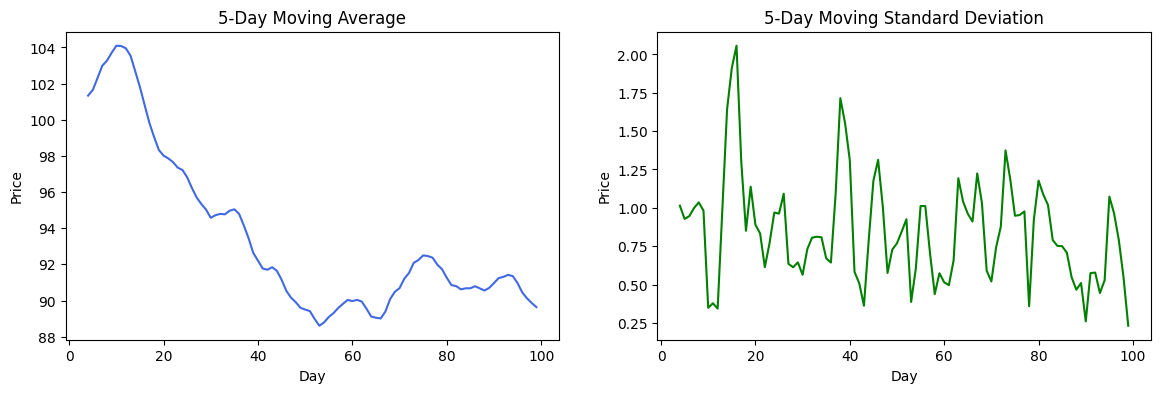

In [8]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 2, 1)
plt.plot(line_two, color = 'royalblue')
plt.title('5-Day Moving Average')
plt.xlabel('Day')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.plot(line_three, color = 'green')
plt.title('5-Day Moving Standard Deviation')
plt.xlabel('Day')
plt.ylabel('Price')

plt.show()

In [9]:
# volatility analysis

df['Rolling_Std_5'].nlargest(5)

16    2.057180
15    1.912070
38    1.715188
14    1.643281
39    1.552145
Name: Rolling_Std_5, dtype: float64

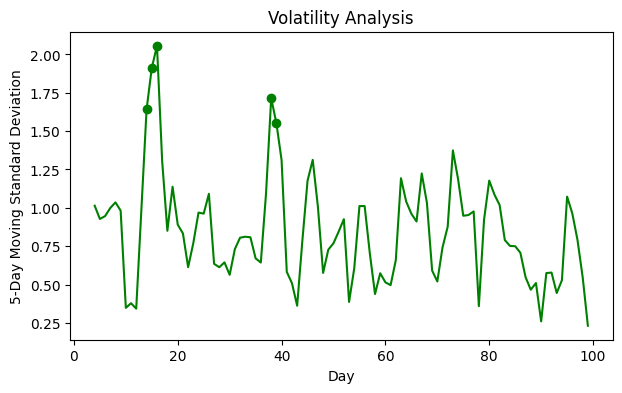

In [10]:
markers = [16, 15, 38, 14, 39]

plt.figure(figsize = (7, 4))
plt.plot(line_three, 'o', ls = '-', markevery = markers, color = 'green')
plt.title('Volatility Analysis')
plt.xlabel('Day')
plt.ylabel('5-Day Moving Standard Deviation')
plt.show()

---

Exercise 2: Detecting Outliers and Exploring Feature Relationships in a Health Dataset

In [11]:
# create synthetic health dataset

age = np.random.randint(20, 70, size = 200)
weight = np.random.normal(65, 12, size = 200)
height = np.random.normal(165, 10, size = 200)
chol = np.random.uniform(150, 300, size = 200)
bp = 80 + 0.5 * age + np.random.normal(0, 1)

data = {
    'Age' : age,
    'Weight' : weight,
    'Height' : height,
    'Cholestrol' : chol,
    'BP' : bp
}

df_two = pd.DataFrame(data)
df_two.head()

,Age,Weight,Height,Cholestrol,BP
0,28,75.594052,174.241524,211.343277,94.236
1,56,59.608347,173.128565,265.782297,108.236
2,52,70.023674,151.492780,151.830461,106.236
3,61,56.261849,158.627645,239.766405,110.736
4,63,43.377344,158.434710,234.826252,111.736


In [12]:
df_two.loc[df_two.sample(frac = 0.05).index, df_two['Weight']] = np.nan